<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/bdu.8.3.SVM.titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


SVM ( Support Vector Machine)

( 패턴인식, 자료분석 )에서 기 활용되어 온 알고리즘

 . 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어 졌을 때 SVM 알고리즘은 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 **비 확률적 이진 선형 분류 모델**

 . 만들어진 분류 모델은 데이터가 사상된 공간 (mapping된 공간) 에서 경계로 표현되는 SVM 알고리즘은 그 중 가장 큰 폭을 가진 경계를 찾는 알고리즘

  . 경계선에서 멀리 떨어진 것이 정확도가 높다는 것.


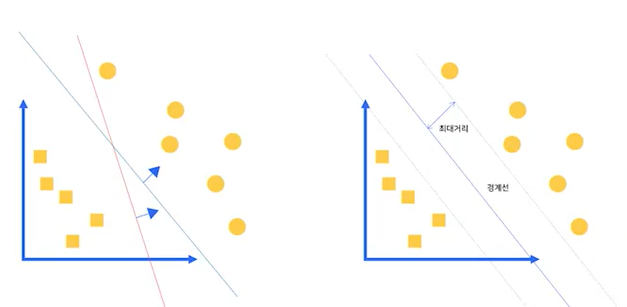

 두 그룹을 분류하는 경계선은 최대한 두 그룹에서 멀리 떨어져 있는 경계선을 구하게 되고,

 이는 두 그룹과의 거리 (margin)를 최대로 만드는 것이 나중에 입력된 데이터를 분류할 때, 더 높은 정확도를 얻을 수 있다.  (경계의 명확화)

 - 결정 경계  ( Decision Surface )
   변수의 객수가 적을 때 ( ex: 이전 분류) 정확히 경계면을 나날 수 있다.
   

  .SVM 을 이용한 titanic data를 할 때.

    무엇을 하려는 것인가 ?

    [ 접근 방법]
       . titaic는 다양한 독립 변수를 기반으로 Survived 라는 종속 변수을 예측.  (이것이 목적이다. 즉 살았나/죽었나를 살펴 봄)

       . 불필요한 속성은 제거하고  (전처리 과정), SVM 알고리즘을 이용하여 학습 모델을 구축한 후 예측을 수행.

       . 성별 (Sex)와 Embarked 에 대해서는 One-Hot - Encoding으로 Label 분리

       . 학습 data와 데스트 data를 7:3 비율로 구성해서 검증하고,
       . classification_report()의 의미를 이해한다.

   . 하려는 것

> 인용구 추가 :  " SVM 을 이용한 타이타닉 생존자 분류 (예측) 분석 수행



In [5]:
# @title
import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn import svm

from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [7]:
df
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [8]:

## 기술 통계를 학인
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:

## 평균값
d_mean = df["Age"].mean()
df["Age"].fillna(d_mean, inplace=True)

## 최빈값
d_mode = df["Embarked"].mode()[0]
df["Embarked"].fillna(d_mode, inplace=True)

## 파생 변수 생성
df["FamilySize"] = df["SibSp"] + df["Parch"]

<ipython-input-24-bce66ae1750f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(d_mean, inplace=True)
<ipython-input-24-bce66ae1750f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [10]:
## one hot encoding  vs.  label encoding
## 지금은 one hot encoding 방식을 사용해 보자.

 레이블 인코딩과  원-핫 인코딩   

인코딩 :  문자를 숫자로 할당해 주는 방법

1. label 인코딩
  : 알파벳 순서로 숫자를 할당해 주는 방법
  : 숫자값을 가중치로 잘못 인식할 수 있는 문제가 있어  선형 회귀에서는 사용하지 않는다.

  2. one-hot-encoding
     : 가변수(가짜 변수)를 이용하여  컬럼값에 대해서 새로운 컬럼으로 만든다.
     : 해당되는 변수에  1로 두고, 나머지는 0 으로 두는 방식으로 컬럼을 분류한다.

In [11]:
### one-hot encoding

#sex 컬럼의 값을 1과 0 으로 원-핫 인코딩 한다.
onehot_sex = pd.get_dummies(df["Sex"])   ## 가짜 변수를 생성
df = pd.concat([df, onehot_sex], axis = 1) ## object value 이름으로 새로운 컬럼 field 생성

#Embarked 컬럼의 값을 원-핫 인코딩 한다.
onehot_embarked = pd.get_dummies(df["Embarked"])
df = pd.concat([df, onehot_embarked], axis=1)  ## object value 이름으로 새로운 컬럼 field 생성



In [12]:
onehot_sex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [13]:
onehot_embarked

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [14]:
X = df[["Pclass", "Age", "Fare", "FamilySize","female", "male", "C", "Q", "S"]]   # cabin, ticket을 뺀다.  text는 영향성이 없다고 사전 판단.
y = df ["Survived"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 9)
(268, 9)
(623,)
(268,)


In [16]:
#SVM 객체 생성
sv = svm.SVC(kernel='rbf')  # kernel의 종류:linear, poly rbf ...
# sv = svm.SVC(kernel='rbf', C=1, gamma=0.1)  # C 비용 , gamma : 허용 ㅍ준 편차
sv.fit(X_train, y_train)

SVC()

In [17]:
pred = sv.predict(X_test)  ## 예측 수행

In [18]:
pred = sv.predict(X_test)

In [19]:
## 모델 성능 - 정확도 측정

In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.7238805970149254


In [21]:
## 모델 성능 평가 - Confusion Matrix 계산

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)   ##실제 분류가 어떻게 되었을 까?
print(mat)

[[167   7]
 [ 67  27]]


In [23]:
## 평가 지표 계산
from sklearn.metrics import classification_report
rpt = classification_report(y_test, pred)
print(rpt)

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       174
           1       0.79      0.29      0.42        94

    accuracy                           0.72       268
   macro avg       0.75      0.62      0.62       268
weighted avg       0.74      0.72      0.68       268

